 # FashionMNIST

 ## Задание 7.2

<img src="https://emiliendupont.github.io/imgs/mnist-chicken/mnist-and-fashion-examples.png">

На практике построим нейронную сеть для классификации картиной. В качестве входных данных используются картинки одежды (в градациях серого, то есть цветовых каналов не 3, а 1). По входной картинке нужно предсказать тип одежды.

In [ ]:
# !pip install torchvision

import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision

Скачаем обучающую и контрольную выборки.

In [ ]:
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=None)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=None)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

Каждая картинка имеет класс от 0 до 9, расшифровка меток класса:  

|class_id|class_name|
|----|----|
|0| T-shirt/top|
|1| Trouser|
|2| Pullover|
|3| Dress|
|4| Coat|
|5| Sandal|
|6| Shirt|
|7| Sneaker|
|8| Bag|
|9| Ankle boot|

In [ ]:
classes = ('T-Shirt/top',
           'Trouser',
           'Pullover',
           'Dress',
           'Coat',
           'Sandal',
           'Shirt',
           'Sneaker',
           'Bag',
           'Ankle boot')

<h2 style="text-align: center;"><b>Задание</b></h2>

In [ ]:
from tabulate import tabulate

Посмотрите на датасет.
* Сколько картинок в train? В test?
* Равномерно ли распределено количество объектов разных классов в train датасете (это можно понять, поработав с полем `train_data` у переменной `trainset`)? в test?
* Выведите несколько картинок с помощью `pyplot`

Используя материалы семинаров по многослойным  и свёрточным сетям, напишите:
1.  Многослойную нейронную сеть MLP (Multi-Layer Perceptron) классифицирующую этот датасет
2. Свёрточную сеть, классифицирующую этот датасет
3. Сравните их качество (по графикам лосса и по Accuracy Score)

Если качество, которое получается у  нейросети, выше 95%, то Вы решили задачу с точностью, которую можно использовать в жизни.

In [ ]:
print("Количество картинок в train и test")

table = [["train", "test"], [len(trainloader.dataset.data), len(testloader.dataset.data)]]
print(tabulate(table))

Количество картинок в train и test
-----  -----
train  test
60000  10000
-----  -----


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


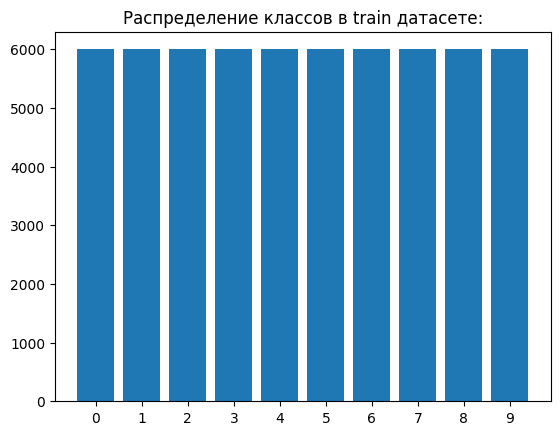

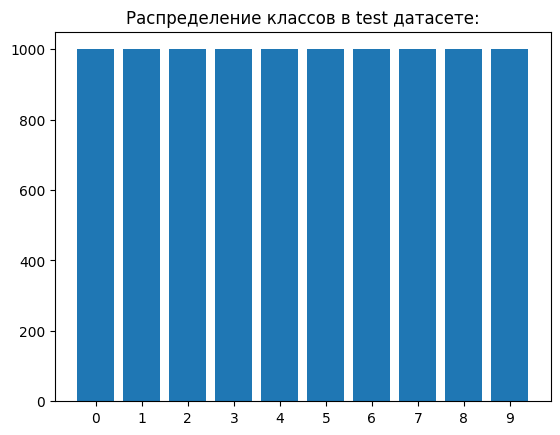

In [ ]:
train_labels, train_counts = np.unique(trainset.train_labels, return_counts=True)
train_class_distribution = dict(zip(train_labels, train_counts))

test_labels, test_counts = np.unique(testset.test_labels, return_counts=True)
test_class_distribution = dict(zip(test_labels, test_counts))


plt.bar(range(len(train_class_distribution)), list(train_class_distribution.values()), align='center')
plt.xticks(range(len(train_class_distribution)), list(train_class_distribution.keys()))
plt.title("Распределение классов в train датасете:")
plt.show()


plt.bar(range(len(test_class_distribution)), list(test_class_distribution.values()), align='center')
plt.xticks(range(len(test_class_distribution)), list(test_class_distribution.keys()))
plt.title("Распределение классов в test датасете:")
plt.show()

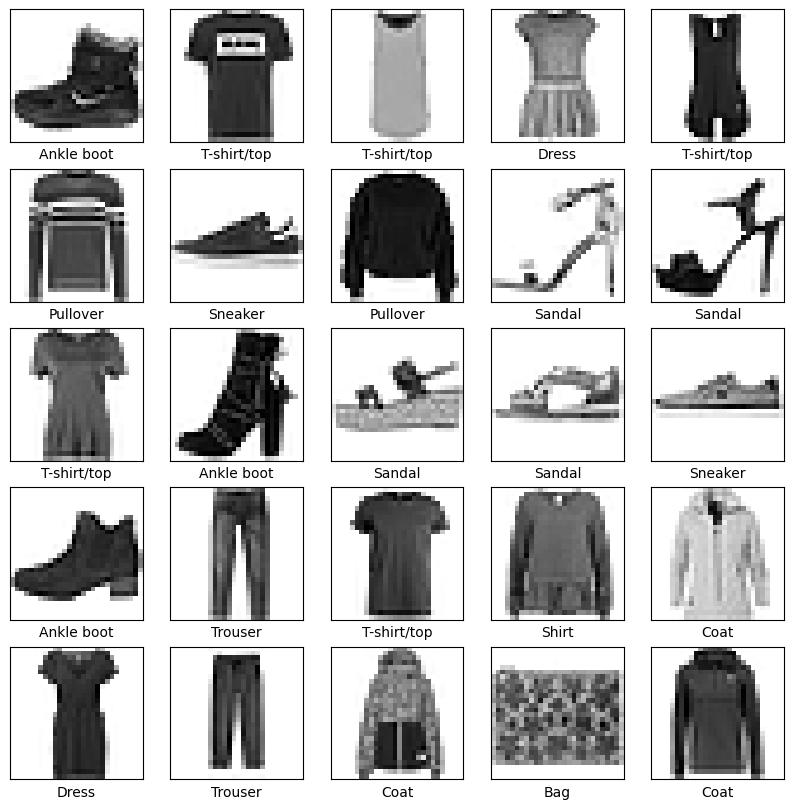

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainloader.dataset.data[i], cmap=plt.cm.binary)
    plt.xlabel(trainloader.dataset.classes[trainloader.dataset.targets[i]])
plt.show()

In [ ]:
import keras

X_train = np.array(trainset.train_data)
X_test = np.array(testset.test_data)
y_train = np.array(trainset.train_labels)
y_test = np.array(testset.test_labels)

y_train=keras.utils.to_categorical(y_train, 10)
y_test=keras.utils.to_categorical(y_test, 10)

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle=True)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization

In [ ]:
def plot_model(history):
    fig, axs = plt.subplots(1,2,figsize=(16,5))

    axs[0].plot(history.history['accuracy'], 'c')
    axs[0].plot(history.history['val_accuracy'], 'm')
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')

    axs[1].plot(history.history['loss'], 'c')
    axs[1].plot(history.history['val_loss'], 'm')
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper right')
    plt.show()

## Multilayer Neural Network

In [ ]:
MLP_model = Sequential()
'''
MLP_model.add(Flatten(input_shape=(28, 28)))

MLP_model.add(Activation('relu'))

MLP_model.add(Dense(units=512, input_shape=(28, 28)))

MLP_model.add(Activation('relu'))
MLP_model.add(Dropout(0.1))

MLP_model.add(Dense(units=256))

MLP_model.add(Activation('relu'))
MLP_model.add(Dropout(0.1))

MLP_model.add(Activation('relu'))
MLP_model.add(Dropout(0.1))

MLP_model.add(Dense(units=128))

MLP_model.add(Activation('relu'))

MLP_model.add(Dense(units=64))

MLP_model.add(Activation('relu'))

MLP_model.add(Dense(units=32))

MLP_model.add(Activation('relu'))
MLP_model.add(Dropout(0.1))

MLP_model.add(Dense(units=10))
MLP_model.add(Activation('softmax')) '''
MLP_model.add(Flatten(input_shape=(28, 28)))
MLP_model.add(Activation('relu'))
MLP_model.add(Dense(units=512, input_shape=(28, 28)))
MLP_model.add(Activation('relu'))
MLP_model.add(Dropout(0.1))
MLP_model.add(Dense(units=256))
MLP_model.add(Activation('relu'))
MLP_model.add(Dropout(0.1))
MLP_model.add(Activation('relu'))
MLP_model.add(Dropout(0.1))
MLP_model.add(Dense(units=128))
MLP_model.add(Activation('relu'))
MLP_model.add(Dense(units=64))
MLP_model.add(Activation('relu'))
MLP_model.add(Dense(units=32))
MLP_model.add(Activation('relu'))
MLP_model.add(Dropout(0.1))
MLP_model.add(Dense(units=10))
MLP_model.add(Activation('softmax'))
MLP_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
MLP_model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
MLP_history = MLP_model.fit(X_train, y_train,
          batch_size=100,
          epochs=35, #epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Epoch 1/35
450/450 [==============================] - 10s 18ms/step - loss: 0.6486 - accuracy: 0.7728 - val_loss: 0.4289 - val_accuracy: 0.8493
Epoch 2/35
450/450 [==============================] - 7s 15ms/step - loss: 0.4394 - accuracy: 0.8444 - val_loss: 0.3732 - val_accuracy: 0.8669
Epoch 3/35
450/450 [==============================] - 8s 18ms/step - loss: 0.3902 - accuracy: 0.8607 - val_loss: 0.3556 - val_accuracy: 0.8741
Epoch 4/35
450/450 [==============================] - 8s 17ms/step - loss: 0.3593 - accuracy: 0.8700 - val_loss: 0.3391 - val_accuracy: 0.8791
Epoch 5/35
450/450 [==============================] - 7s 16ms/step - loss: 0.3407 - accuracy: 0.8770 - val_loss: 0.3245 - val_accuracy: 0.8827
Epoch 6/35
450/450 [==============================] - 10s 22ms/step - loss: 0.3270 - accuracy: 0.8813 - val_loss: 0.3223 - val_accuracy: 0.8830
Epoch 7/35
450/450 [==============================] - 7s 15ms/step - loss: 0.3142 - accuracy: 0.8862 - val_loss: 0.3254 - val_accuracy: 0.88

In [ ]:
MLP_score = MLP_model.evaluate(X_test, y_test, verbose=0)

print('MLP accuracy:', MLP_score[1])

MLP accuracy: 0.88919997215271


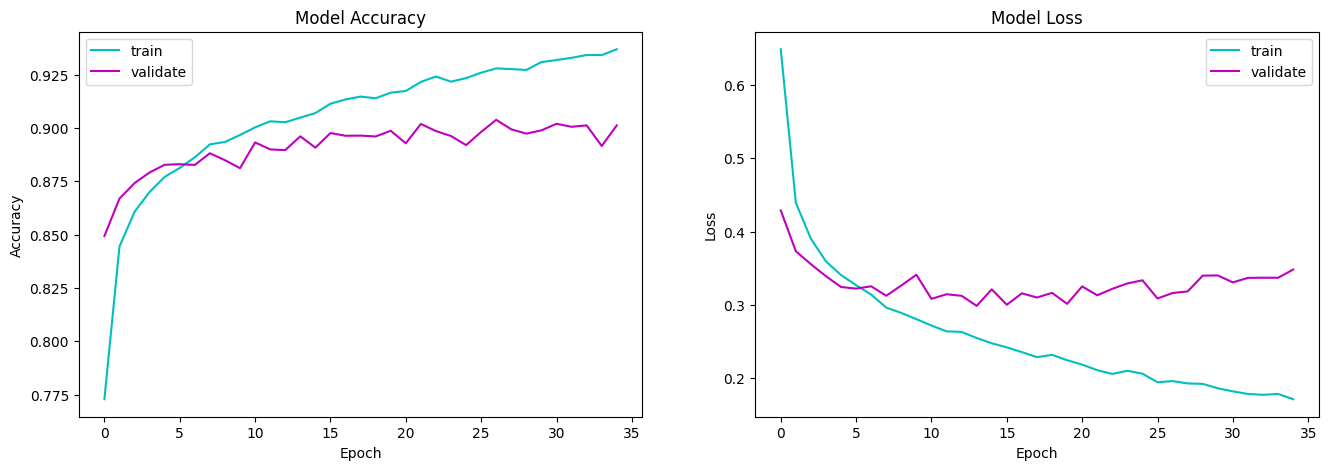

In [ ]:
plot_model(MLP_history)

## Convolutional Neural Network

In [ ]:
'''CNN_model = Sequential()

CNN_model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
CNN_model.add(MaxPooling2D(pool_size=2))
CNN_model.add(Dropout(0.3))
CNN_model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
CNN_model.add(MaxPooling2D(pool_size=2))
CNN_model.add(Dropout(0.3))
CNN_model.add(Flatten())
CNN_model.add(Dense(256, activation='relu'))
CNN_model.add(Dropout(0.5))
CNN_model.add(Dense(10, activation='softmax'))

CNN_model.summary()'''
CNN_model = Sequential()
CNN_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
CNN_model.add(BatchNormalization())

CNN_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
CNN_model.add(Dropout(0.2))#CNN_model.add(Dropout(0.25))

CNN_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
CNN_model.add(BatchNormalization())
CNN_model.add(Dropout(0.2))

CNN_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
CNN_model.add(Dropout(0.2))

CNN_model.add(Flatten())

CNN_model.add(Dense(512, activation='relu'))
CNN_model.add(BatchNormalization())
CNN_model.add(Dropout(0.25))#CNN_model.add(Dropout(0.5))

#####
'''
CNN_model.add(Dense(512, activation='relu'))
CNN_model.add(BatchNormalization())
CNN_model.add(Dropout(0.25))#CNN_model.add(Dropout(0.5))
'''
#####

CNN_model.add(Dense(128, activation='relu'))
CNN_model.add(BatchNormalization())
CNN_model.add(Dropout(0.25))#CNN_model.add(Dropout(0.5))

CNN_model.add(Dense(10, activation='softmax'))

''' 931
CNN_model.add(Conv2D(32, 3, padding='same', activation='relu',kernel_initializer='he_normal', input_shape=(28, 28, 1)))
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))


CNN_model.add(Conv2D(64, 3, padding='same', activation='relu'))
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))

CNN_model.add(Dropout(0.3))
CNN_model.add(BatchNormalization())
CNN_model.add(Conv2D(128, 3, padding='same', activation='relu'))
CNN_model.add(Conv2D(128, 3, padding='same', activation='relu'))
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))

CNN_model.add(Dropout(0.4))
CNN_model.add(Flatten())
CNN_model.add(BatchNormalization())
CNN_model.add(Dense(512, activation='relu'))

CNN_model.add(Dropout(0.25))
CNN_model.add(Dense(10, activation='softmax'))'''

'''
CNN_model.add(Conv2D(16, (3,3), padding='same', activation='relu',input_shape=(28, 28, 1)))
CNN_model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
CNN_model.add(MaxPooling2D((2, 2), strides=2))
CNN_model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
CNN_model.add(MaxPooling2D((2, 2), strides=2))
CNN_model.add(Dropout(0.5))
CNN_model.add(Flatten())
CNN_model.add(Dropout(0.6))
CNN_model.add(Dense(128, activation='relu'))
CNN_model.add(Dense(10, activation='softmax'))'''

"\nCNN_model.add(Conv2D(16, (3,3), padding='same', activation='relu',input_shape=(28, 28, 1)))\nCNN_model.add(Conv2D(32, (3,3), padding='same', activation='relu'))\nCNN_model.add(MaxPooling2D((2, 2), strides=2))\nCNN_model.add(Conv2D(64, (3,3), padding='same', activation='relu'))\nCNN_model.add(MaxPooling2D((2, 2), strides=2))\nCNN_model.add(Dropout(0.5))\nCNN_model.add(Flatten())\nCNN_model.add(Dropout(0.6))\nCNN_model.add(Dense(128, activation='relu'))\nCNN_model.add(Dense(10, activation='softmax'))"

In [ ]:
'''CNN_model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])'''
'''from keras.optimizers.legacy import Adam

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

CNN_model.compile(optimizer = optimizer,
              loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])'''
CNN_model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
'''CNN_model.fit(X_train,
         y_train,
         batch_size=128, # 64,
         epochs=10,
         validation_data=(X_test, y_test))'''

CNN_history = CNN_model.fit(X_train, y_train,
          batch_size=256,
          epochs=15, #epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))
'''CNN_history= CNN_model.fit(X_train, y_train,
                  batch_size=128,
                  epochs=100,
                  verbose=1)'''
'''
CNN_history = CNN_model.fit(X_train, y_train, epochs = 15, verbose=2, validation_split=0.75)'''

Epoch 1/15
176/176 [==============================] - 144s 801ms/step - loss: 0.5673 - accuracy: 0.7988 - val_loss: 4.3423 - val_accuracy: 0.1015
Epoch 2/15
176/176 [==============================] - 143s 814ms/step - loss: 0.3575 - accuracy: 0.8692 - val_loss: 3.5766 - val_accuracy: 0.1981
Epoch 3/15
176/176 [==============================] - 144s 820ms/step - loss: 0.3051 - accuracy: 0.8876 - val_loss: 0.7117 - val_accuracy: 0.7503
Epoch 4/15
176/176 [==============================] - 145s 823ms/step - loss: 0.2796 - accuracy: 0.8991 - val_loss: 0.2824 - val_accuracy: 0.8977
Epoch 5/15
176/176 [==============================] - 144s 818ms/step - loss: 0.2507 - accuracy: 0.9080 - val_loss: 0.2532 - val_accuracy: 0.9101
Epoch 6/15
176/176 [==============================] - 145s 825ms/step - loss: 0.2367 - accuracy: 0.9129 - val_loss: 0.2482 - val_accuracy: 0.9121
Epoch 7/15
176/176 [==============================] - 144s 818ms/step - loss: 0.2235 - accuracy: 0.9173 - val_loss: 0.2337 -

'\nCNN_history = CNN_model.fit(X_train, y_train, epochs = 15, verbose=2, validation_split=0.75)'

In [ ]:
CNN_score = CNN_model.evaluate(X_test, y_test, verbose=0)

print('CNN accuracy:', CNN_score[1])

CNN accuracy: 0.9204999804496765


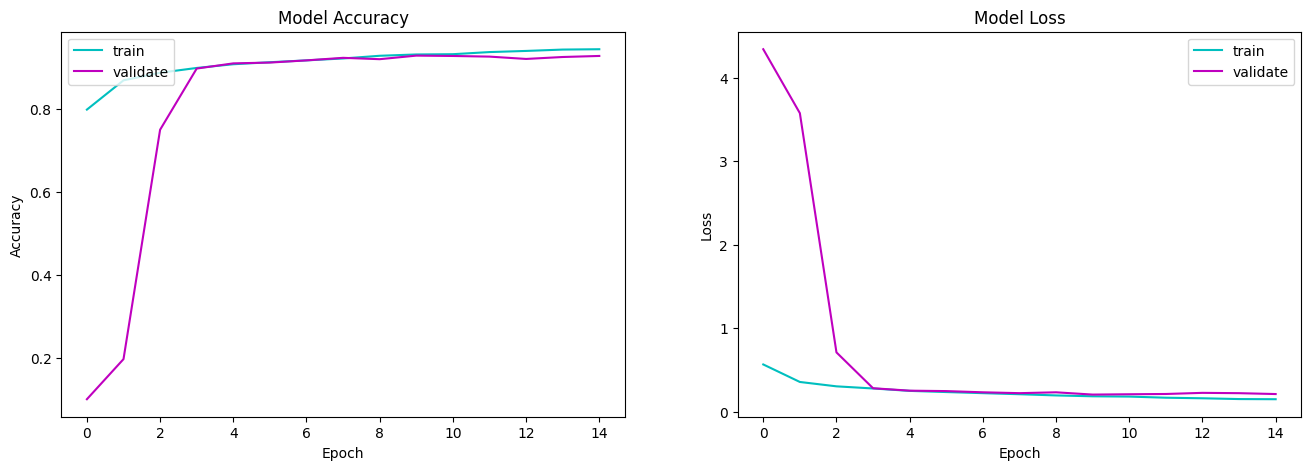

In [ ]:
plot_model(CNN_history)